In [1]:
from preprocessing import *
from train_evaluate import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchsummary import summary

import numpy as np

# Data Setup

## Load Data

In [2]:
data_dir = '/Users/michael/Desktop/Home/研究所/ECE247/projects/data/'
X_train_valid, y_train_valid, X_test, y_test = load_data(data_dir, subjects=[1]) # default subjects=[1,2,3,4,5,6,7,8,9]

## Preprocessing

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)

Shape of x_train: (758, 250, 1, 22)
Shape of x_valid: (190, 250, 1, 22)
Shape of x_test: (200, 250, 1, 22)
Shape of y_train: torch.Size([758, 4])
Shape of y_valid: torch.Size([190, 4])
Shape of y_test: torch.Size([200, 4])


## PyTorch Dataloaders

In [4]:
data_loaders  = dataloader_setup(x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size=32)

# LSTM

In [5]:
class LSTM(nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(22, 64, 3, batch_first=True, dropout=0.5)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.5),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

# Train / Validate / Test

In [13]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

In [14]:
# initiate LSTM model
model = LSTM()

# create your optimizer
optimizer = optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.44511
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.42791
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.49990
	Train loss: 0.04360, Accuracy: 222/758 (29.00%)
	Validation loss: 0.00728, Accuracy: 47/190 (24.00%)
	Test loss: 0.00695, Accuracy: 54/200 (27.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.38212
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.37852
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.45225
	Train loss: 0.04183, Accuracy: 301/758 (39.00%)
	Validation loss: 0.00696, Accuracy: 77/190 (40.00%)
	Test loss: 0.00686, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.37657
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.31172
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.40536
	Train loss: 0.04118, Accuracy: 331/758 (43.00%)
	Validation loss: 0.00685, Accuracy: 80/190 (42.00%)
	Test loss: 0.00690, Accuracy: 59/200 (29.00%)

T

	Train loss: 0.00781, Accuracy: 715/758 (94.00%)
	Validation loss: 0.00268, Accuracy: 158/190 (83.00%)
	Test loss: 0.00974, Accuracy: 55/200 (27.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.42234
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.36141
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.31864
	Train loss: 0.00635, Accuracy: 725/758 (95.00%)
	Validation loss: 0.00246, Accuracy: 154/190 (81.00%)
	Test loss: 0.00978, Accuracy: 53/200 (26.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.41827
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.36543
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.37138
	Train loss: 0.00657, Accuracy: 715/758 (94.00%)
	Validation loss: 0.00246, Accuracy: 158/190 (83.00%)
	Test loss: 0.01149, Accuracy: 41/200 (20.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.31404
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.19210
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.20284
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.05571
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.04569
	Train loss: 0.00086, Accuracy: 753/758 (99.00%)
	Validation loss: 0.00119, Accuracy: 176/190 (92.00%)
	Test loss: 0.01613, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.11605
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.11227
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.07313
	Train loss: 0.00062, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00102, Accuracy: 178/190 (93.00%)
	Test loss: 0.01675, Accuracy: 49/200 (24.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.09726
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.08929
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.10139
	Train loss: 0.00085, Accuracy: 751/758 (99.00%)
	Validation loss: 0.00087, Accuracy: 180/190 (94.00%)
	Test loss: 0.01582, Accuracy: 55/200

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.01906
	Train loss: 0.00032, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00055, Accuracy: 185/190 (97.00%)
	Test loss: 0.01716, Accuracy: 51/200 (25.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.02415
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.04334
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.03369
	Train loss: 0.00024, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00054, Accuracy: 187/190 (98.00%)
	Test loss: 0.01660, Accuracy: 54/200 (27.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.02653
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.15799
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.05405
	Train loss: 0.00014, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00026, Accuracy: 188/190 (98.00%)
	Test loss: 0.01711, Accuracy: 59/200 (29.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.03441
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Lo

	Validation loss: 0.00046, Accuracy: 186/190 (97.00%)
	Test loss: 0.02027, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.05742
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.08412
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.05180
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00040, Accuracy: 186/190 (97.00%)
	Test loss: 0.01929, Accuracy: 50/200 (25.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.02581
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00489
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.03515
	Train loss: 0.00004, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00054, Accuracy: 186/190 (97.00%)
	Test loss: 0.02110, Accuracy: 48/200 (24.00%)

Best validation accuracy:
0.9894736842105263
Best test accuracy:
0.35


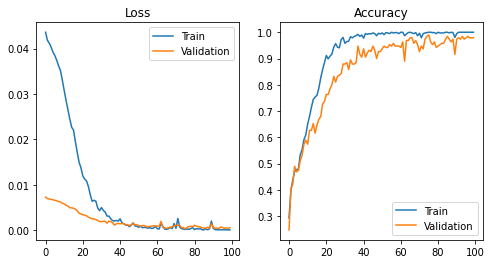

In [15]:
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

# RNN_LSTM

In [16]:
class RNN_LSTM(nn.Module):
    def __init__(self, input_size=22, hidden_size=64, num_layers=2, num_classes=4):
        super(RNN_LSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Dim: batch_size, time, feature
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True,dropout = 0.5)
        self.fc = nn.Sequential(
                    nn.Linear(hidden_size, num_classes),
                    
        )
        

    def forward(self, x):
        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        # Forward propagate RNN
        out, _ = self.lstm(x)

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.40051
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.39602
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.38647
	Train loss: 0.04388, Accuracy: 183/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.40023
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.39305
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.38987
	Train loss: 0.04387, Accuracy: 191/758 (25.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.41057
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.40014
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.39437
	Train loss: 0.04387, Accuracy: 184/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

T

	Train loss: 0.04387, Accuracy: 185/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 1.40958
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 1.40096
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 1.38675
	Train loss: 0.04387, Accuracy: 185/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 1.40096
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 1.39571
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 1.38635
	Train loss: 0.04385, Accuracy: 187/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 1.40664
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 1.38866
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Loss: 

Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 1.40755
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 1.39572
	Train loss: 0.04389, Accuracy: 185/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 1.40162
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 1.39301
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 1.39180
	Train loss: 0.04386, Accuracy: 186/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 1.41105
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 1.40306
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 1.39430
	Train loss: 0.04388, Accuracy: 185/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 53 [0/758 (0.00%)]		Loss: 

	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 1.39834
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 1.39055
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 1.39217
	Train loss: 0.04387, Accuracy: 187/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 1.40349
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 1.40464
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 1.39077
	Train loss: 0.04389, Accuracy: 182/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 1.39624
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Loss: 1.39866
Training Progress: 	Epoch 77 [640/758 (83.33%)]		Loss: 1.39059
	Train loss: 0.04387, Accuracy: 186/758 (

Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 1.39499
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 1.39237
	Train loss: 0.04388, Accuracy: 187/758 (24.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 1.40078
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 1.40303
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 1.39517
	Train loss: 0.04386, Accuracy: 191/758 (25.00%)
	Validation loss: 0.00729, Accuracy: 48/190 (25.00%)
	Test loss: 0.00693, Accuracy: 48/200 (24.00%)

Best validation accuracy:
0.25263157894736843
Best test accuracy:
0.24


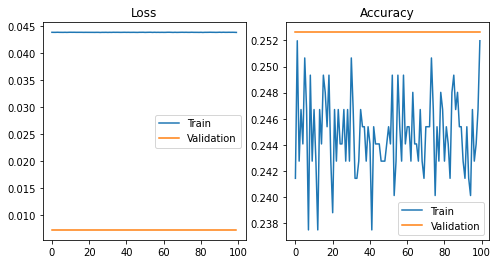

In [17]:
rnn_lstm = RNN_LSTM()
train_and_evaluate(rnn_lstm, optimizer, data_loaders, num_epochs=EPOCHS)